# **Data Mining Project**

The project will use the CRISP-DM methodology.

## **Business Understanding**

### **Business Objectives**
A nonprofit organization that survives on fundraising will start contacting people to request donations. However, there are few collaborators and the latest attempts have not yielded an expected result. For this reason, the organization decided to carry out a data mining project based on the success criteria of the project: better assertiveness in financial funding.
Knowing the remuneration of an individual can help the organization (since it is possible to redirect a percentage of the Income Tax to donations through the FIA - Childhood and Adolescence Fund) to make the most appropriate requests for a request for support and collaboration, or even if they really should get in touch with the person, then this is the **criterion for successful mining**.

### **Assess Situation**
- Available staff: Bruno Campos (Data Scientist)
- Computational resources: The data set to be explored is the Census Income Data Set hosted in the Machine Learning UCI Repository.

### **Data Mining Goals**
The goal is to build a model that can predict whether an individual earns more than $ 50,000.

So how **outgoing artifacts** will be a rating for which people to contact, people who earn over $ 50,000, to ask for donations.

### **Project Plan**
The project will follow the phases and tasks of the CRISP-DM methodology.

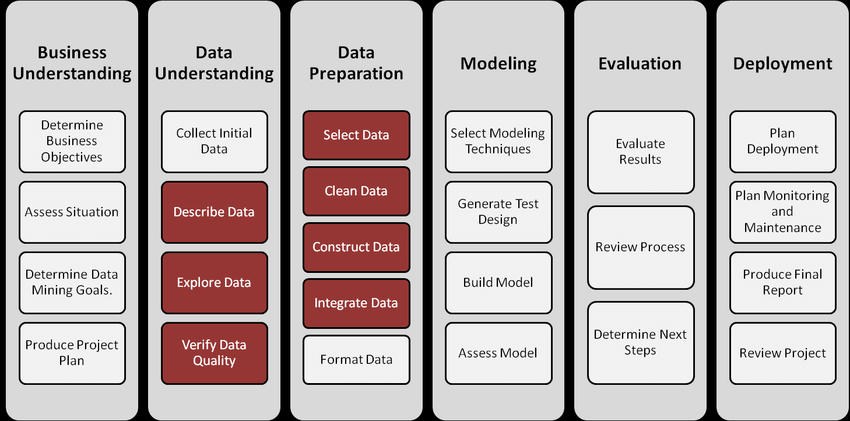

- Supervised learning techniques will be explored.
- As resources will be used a personal computer, internet, material from data mining classes, an Operating System, a browser, a virtual Python environment, libraries (detailed in the file `requirements.txt`).
- The risks: not having electricity, having no internet signal, personal computer breaking, lack of knowledge in data mining.
- Critical points of the project: the main tools for the work will be the Python language and its libraries.

- As preliminary techniques will be used:
  - exploratory data analysis
  - data preprocessing using techniques such as one-hot-enconding, subsampling, normalization of fetures
  - predictive modeling using decision trees and vector support machines
  - evaluation of results using metrics as accuracy

---

## **Prepare Environment**

<br/>

### Auxiliary Code to Hide the Code in Jupyter

In [ ]:
%%html

<script>
code_show = true;

function code_display() {
    if (!code_show) {
        $('div.input').each(function (id) {
            $(this).show();
        });
        $('div.output_prompt').css('opacity', 1);
    } else {
        $('div.input').each(function (id) {
            if (id == 0 || $(this).html().indexOf('# hide_code') > -1) {
                $(this).hide();
            }
        });
        $('div.output_prompt').css('opacity', 0);
    }
    ;
    code_show = !code_show;
}

$(document).ready(code_display);
</script>

<form action="javascript: code_display()">
    <input style="color: #0f0c0c; background: LightGray; opacity: 0.8;" \
    type="submit" value="Click aqui para mostrar/ocultar o código">
</form>

<br/>

### Imports

In [191]:
# hide_code

# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# distribuition data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Other
from IPython.display import Image
from time import time
import configparser
import subprocess
import warnings
import pprint
import os

<br/>

### Prepare Principal Directory

In [192]:
# hide_code
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [193]:
# hide_code

path_to_work('notebooks')

'Current working directory: /home/campos/projects/artificial_inteligence/data_science_projects/encontrar_doadores'

<br/>

### Set Config

In [194]:
# Visualization inside the jupyter
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

---

## **Data Understanding**

### **Collect Initial Data**
- The data were collected in the 1994 American census.
- The data set to be explored is the **Census Income Data Set** hosted in [Machine Learning UCI Repository] (https://archive.ics.uci.edu/ml/datasets/Census+Income). In this work it was adapted for csv to already contain the name of the columns.

In [195]:
%%time

df = pd.read_csv("data/raw/census.csv", 
                 encoding='utf-8')
# hide_code

CPU times: user 66.8 ms, sys: 11.9 ms, total: 78.7 ms
Wall time: 86.8 ms


### **Describe Data**



In [196]:
# hide_code

print("Dataframe:\n{} rows\n{} columns"
      .format(df.shape[0],
              df.shape[1]))

Dataframe:
45222 rows
14 columns


In [197]:
# hide_code

df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00,0.00,40.00,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00,0.00,13.00,United-States,<=50K
2,38,Private,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00,0.00,40.00,United-States,<=50K
3,53,Private,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00,0.00,40.00,United-States,<=50K
4,28,Private,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00,0.00,40.00,Cuba,<=50K


#### Dataset General Information
- The census data set is in csv format
- It has 45222 rows and 14 columns

#### Features
- `age`: Age
- Workclass: Working class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Education level (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate , 5th-6th, Preschool)
- `education-num`: Number of years of study completed
- marital-status: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Professional occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport- moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- Race: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- capital-gain: Monetary capital gains
- capital-loss: Losses of monetary capital
- `hours-per-week`: Average hours worked per week
- `native-country`: Country of origin (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US (Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El- Salvador, Trinadad & Tobago, Peru, Hong, Holand-Netherlands)

#### Target
- The target variables is: `income`

### **Explore Data**
First, let's explore what the column types are.

In [198]:
# hide_code

# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [199]:
# hide_code

def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist()

In [200]:
# hide_code

list_numerical_col = get_col(df=df,
                             type_descr=np.number)
list_categorical_col = get_col(df=df,
                               type_descr=np.object)
list_columns = get_col(df=df,
                       type_descr=[np.object, np.number])

- Numeric columns:

In [201]:
# hide_code

list_numerical_col

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

- Categorical columns:

In [202]:
# hide_code

list_categorical_col

['workclass',
 'education_level',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

#### Measure Location

In [203]:
# hide_code

def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get measures localization + total col + % type columns 
    Handler when type data not exists
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [204]:
# hide_code

show_measures_location(df=df,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 14
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.00,45222,45222,45222.00,45222,45222,45222,45222,45222,45222.00,45222.00,45222.00,45222,45222
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.55,NaN,NaN,10.12,NaN,NaN,NaN,NaN,NaN,1101.43,88.60,40.94,NaN,NaN
std,13.22,NaN,NaN,2.55,NaN,NaN,NaN,NaN,NaN,7506.43,404.96,12.01,NaN,NaN
min,17.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,NaN,NaN
25%,28.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
50%,37.00,NaN,NaN,10.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
75%,47.00,NaN,NaN,13.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,45.00,NaN,NaN


In [205]:
# hide_code

show_measures_location(df=df,
                       type_descr=[np.number])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>]: 5
PERCENTAGE [<class 'numpy.number'>] in dataframe: 35.71 %


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.00,45222.00,45222.00,45222.00,45222.00
mean,38.55,10.12,1101.43,88.60,40.94
std,13.22,2.55,7506.43,404.96,12.01
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,47.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


In [206]:
# hide_code

show_measures_location(df=df,
                       type_descr=[np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'object'>]: 9
PERCENTAGE [<class 'object'>] in dataframe: 64.29 %


,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


#### Histograms
In the images below there are the histograms for the numerical data:

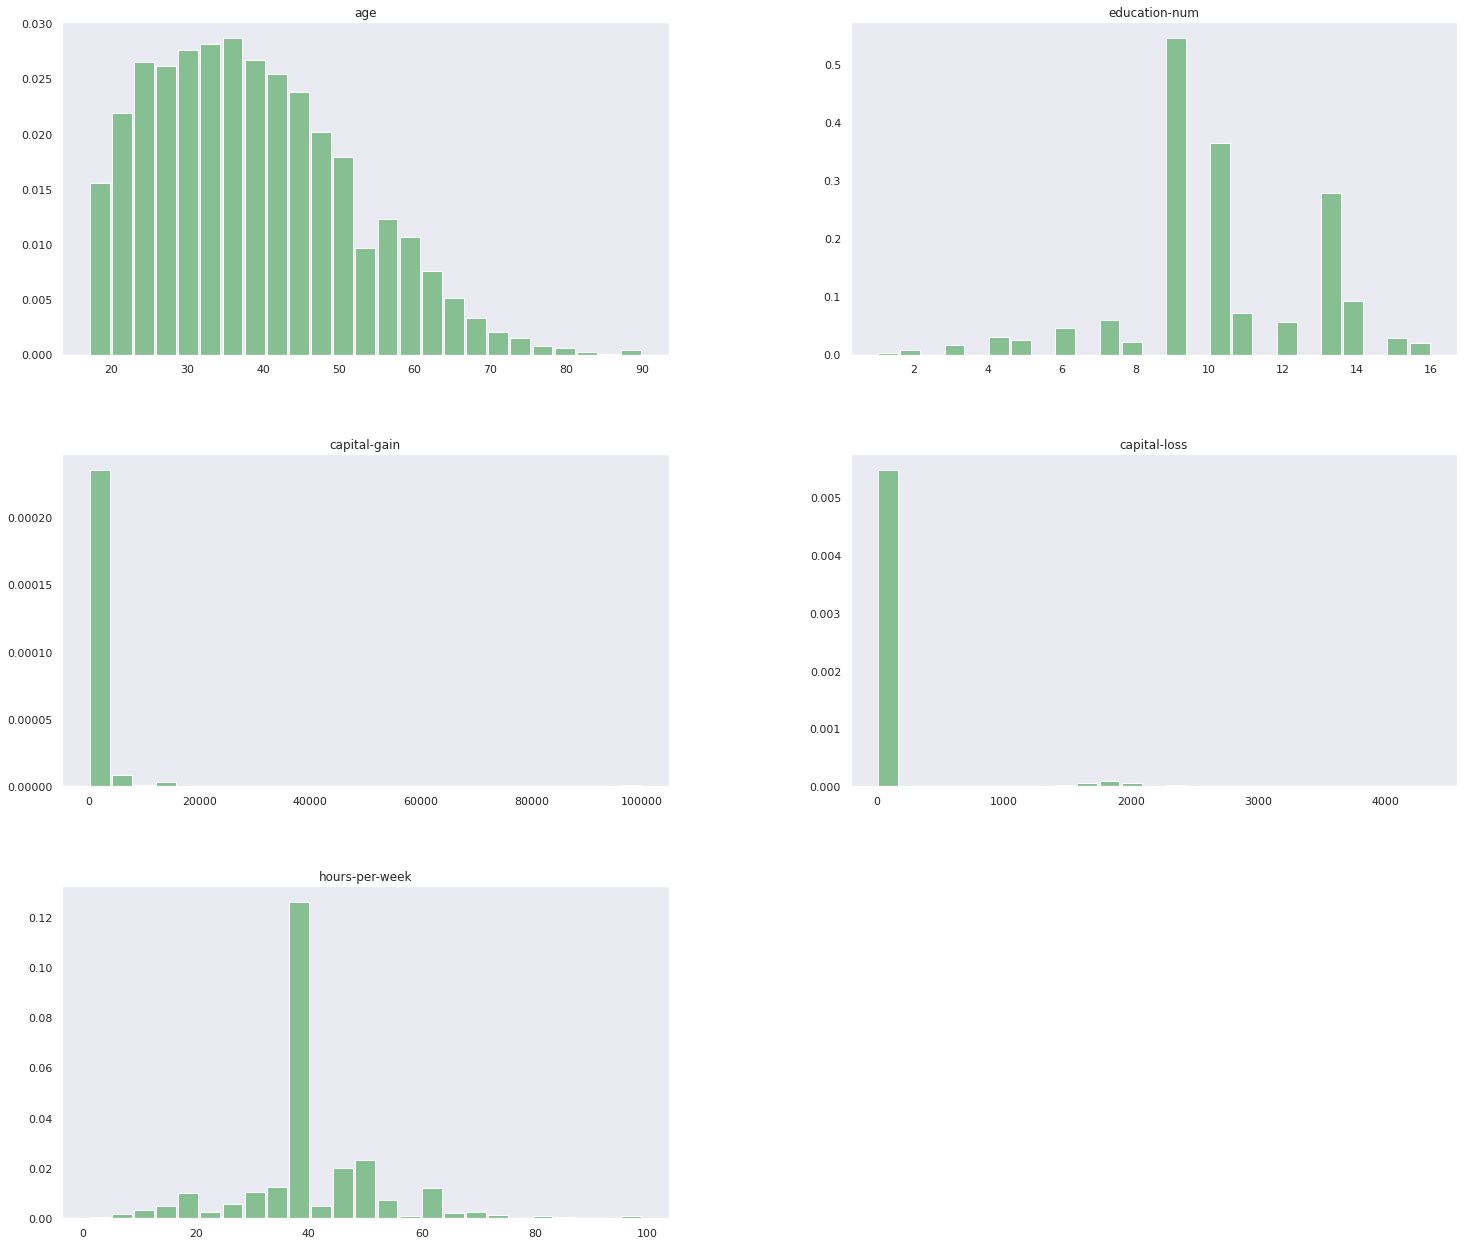

In [207]:
# hide_code

# the histogram of the data
x = df[list_numerical_col].hist(figsize=[25,22], 
                                density=True, 
                                bins=25, 
                                grid=False, 
                                color='#86bf91', 
                                zorder=2, 
                                rwidth=0.9)

**Analyze**

Capital-gain and capital-loss present a great distortion in the distribution of values.

#### Correlations
The images below show the graphs and the correlation matrix for the numerical data:

#### Observations

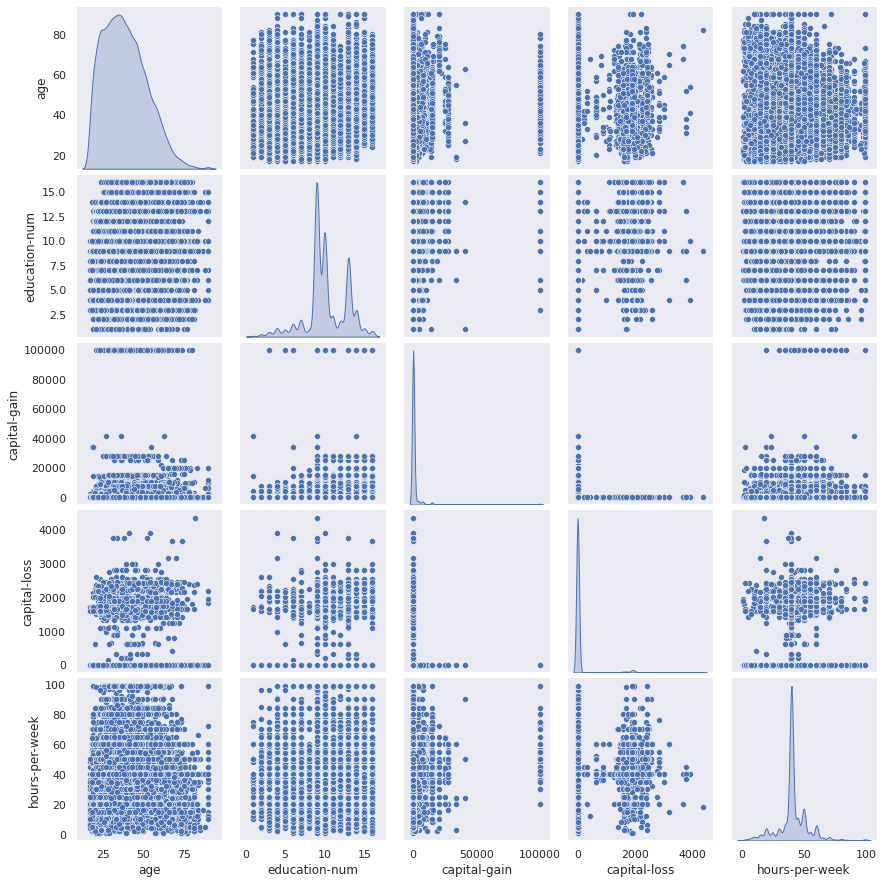

In [208]:
# hide_code

corr_cont_types_all = sns.pairplot(
    df[list_numerical_col],
    kind = 'scatter',
    diag_kind='kde')

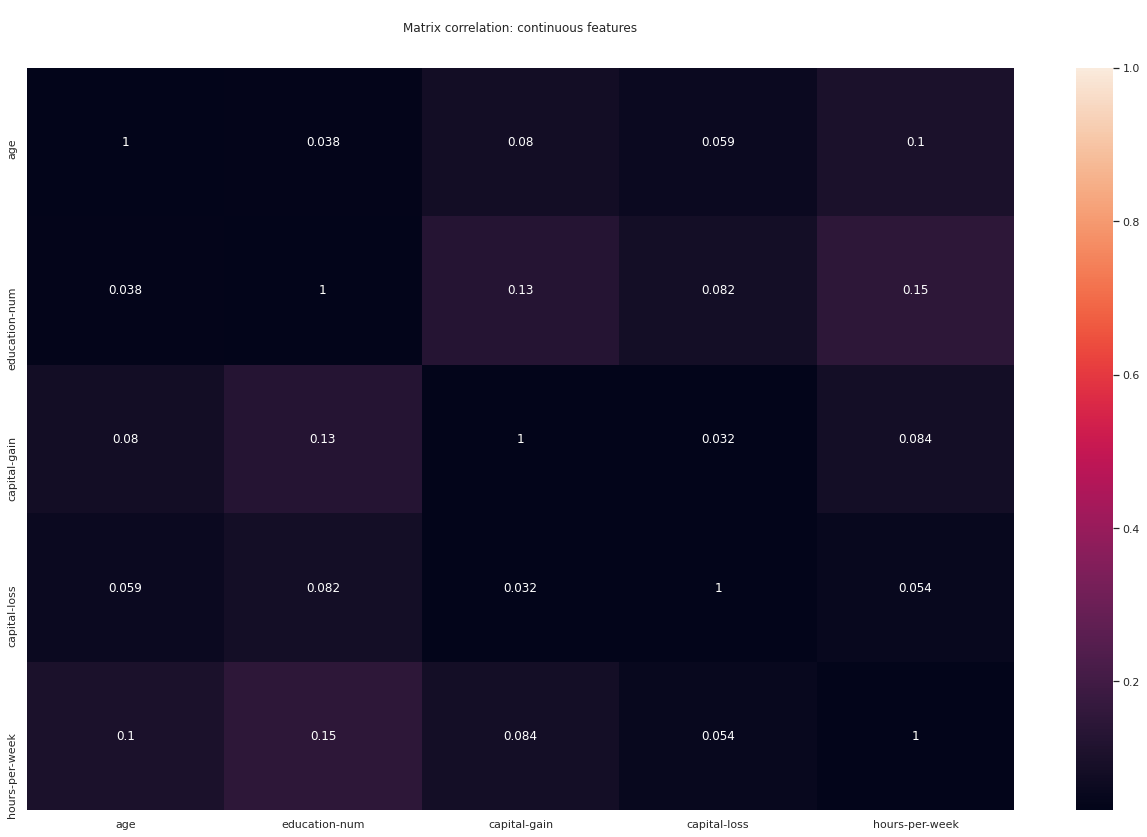

In [209]:
# hide_code

correlationMatrix = df[list_numerical_col].corr().abs()

plt.subplots(figsize=(18, 11))
plt.tight_layout() # save images without cut


sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
corr_matrix_cont = sns.heatmap(correlationMatrix,
            mask=correlationMatrix < 1,
            cbar=False,
            linecolor='white',
            annot = True)

plt.title("\nMatrix correlation: continuous features\n\n")
plt.autoscale()
plt.show()

- Number of records with an annual remuneration greater than $ 50,000:

In [210]:
# hide_code

n_greater_50k = df[(df.income == '>50K')].shape[0]
n_greater_50k

11208

- The percentage of individuals with an annual remuneration greater than $ 50,000

In [211]:
# hide_code

greater_percent = 100.0 * n_greater_50k / df.shape[0]
greater_percent

24.78439697492371

- One point to be analyzed is the relationship between an individual's features and his income:
   - Chart group 01: count of people who earn above or below 50 thousand based on their gender and education

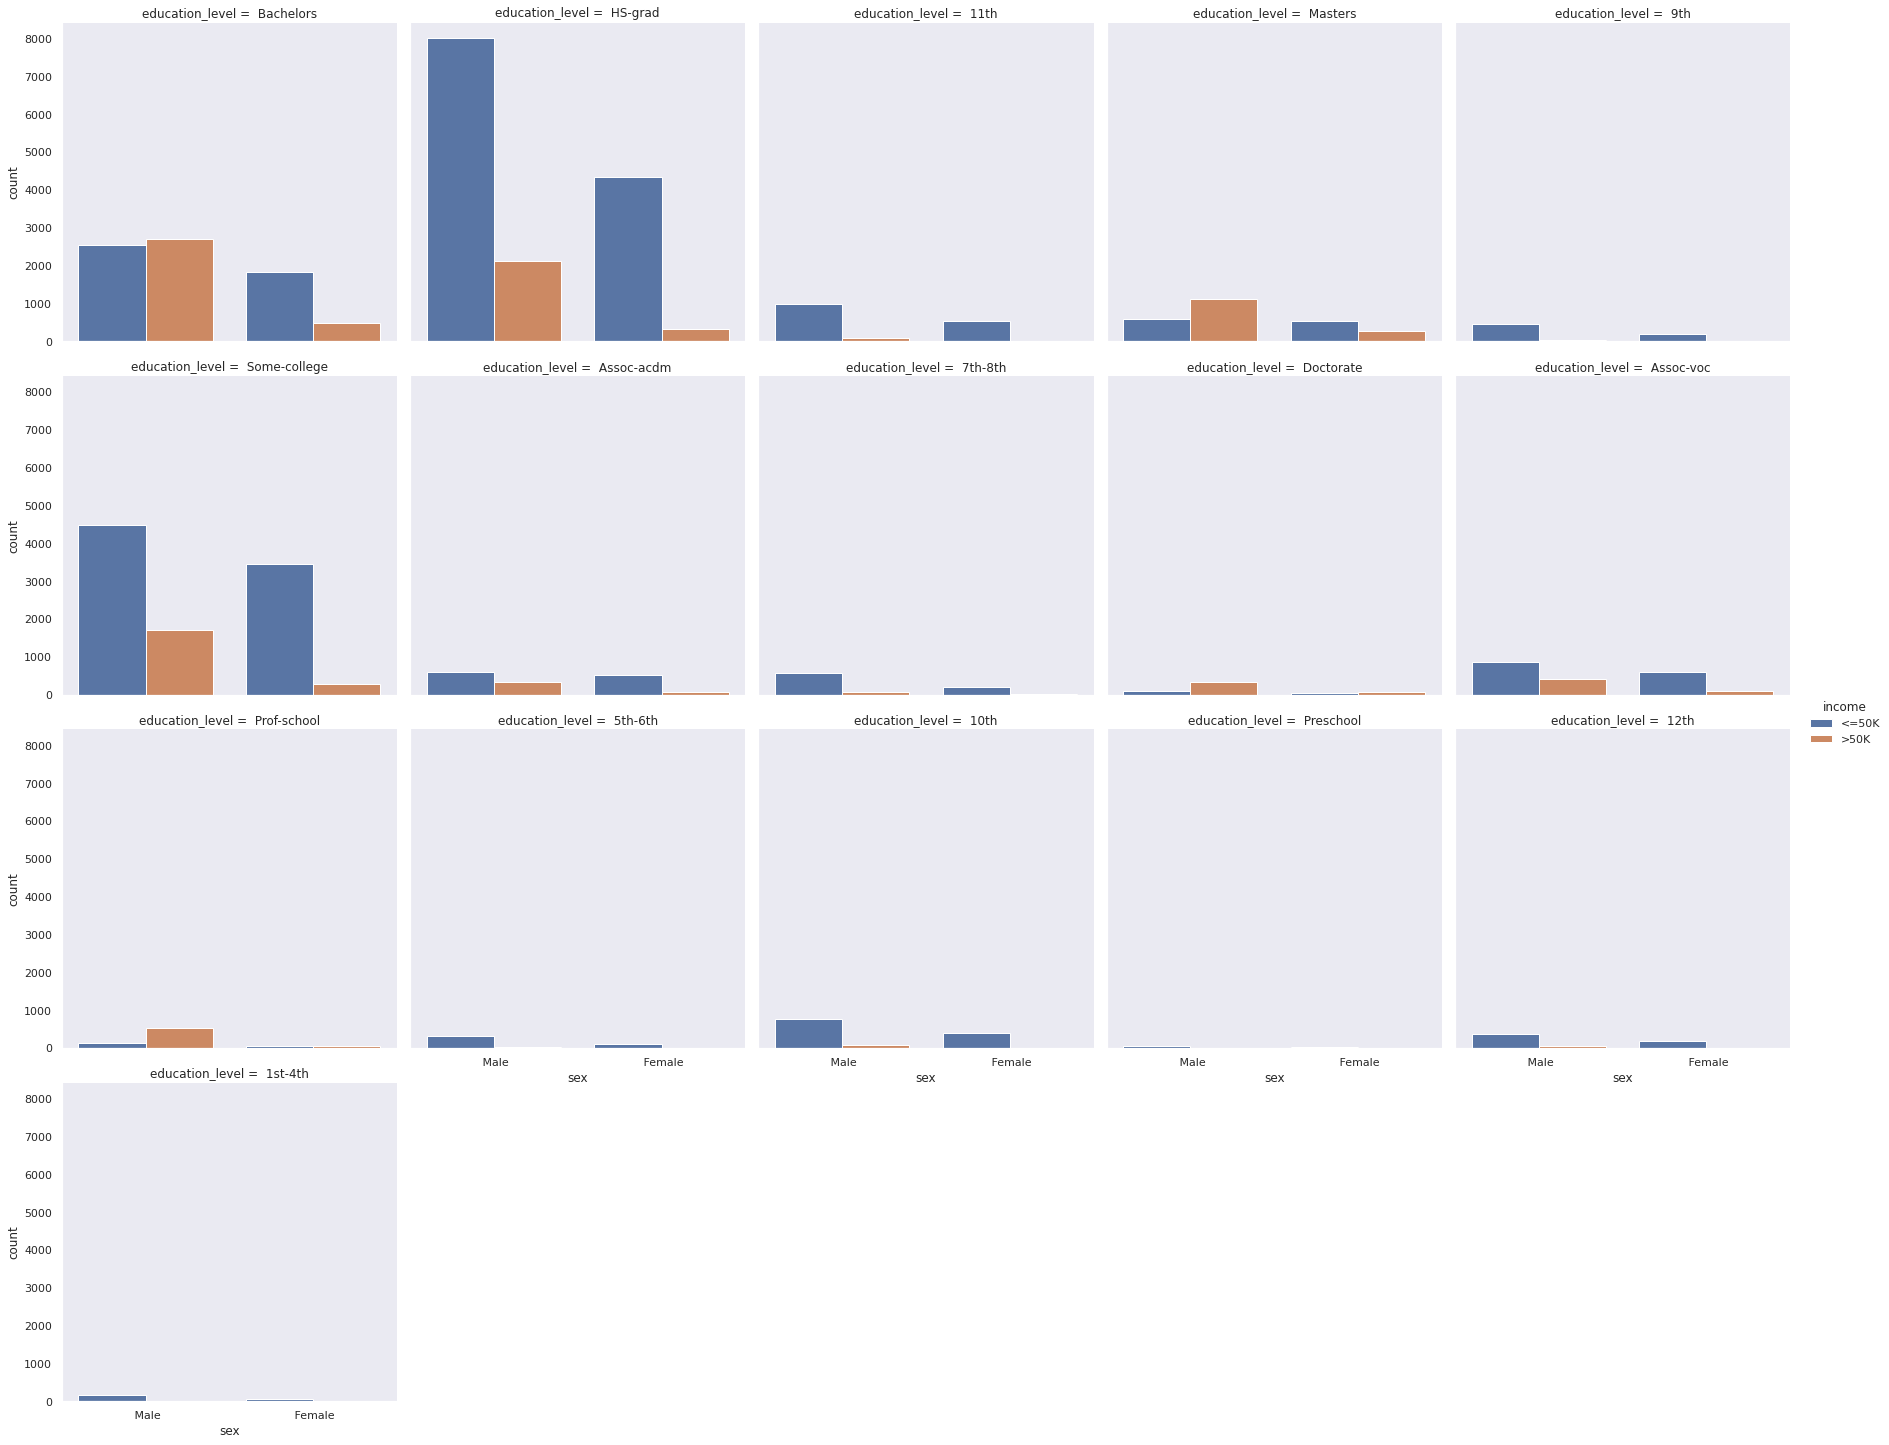

In [212]:
# hide_code

x = sns.factorplot("sex", 
                   col='education_level',
                   data=df,
                   hue='income',
                   kind="count",
                   col_wrap=5)

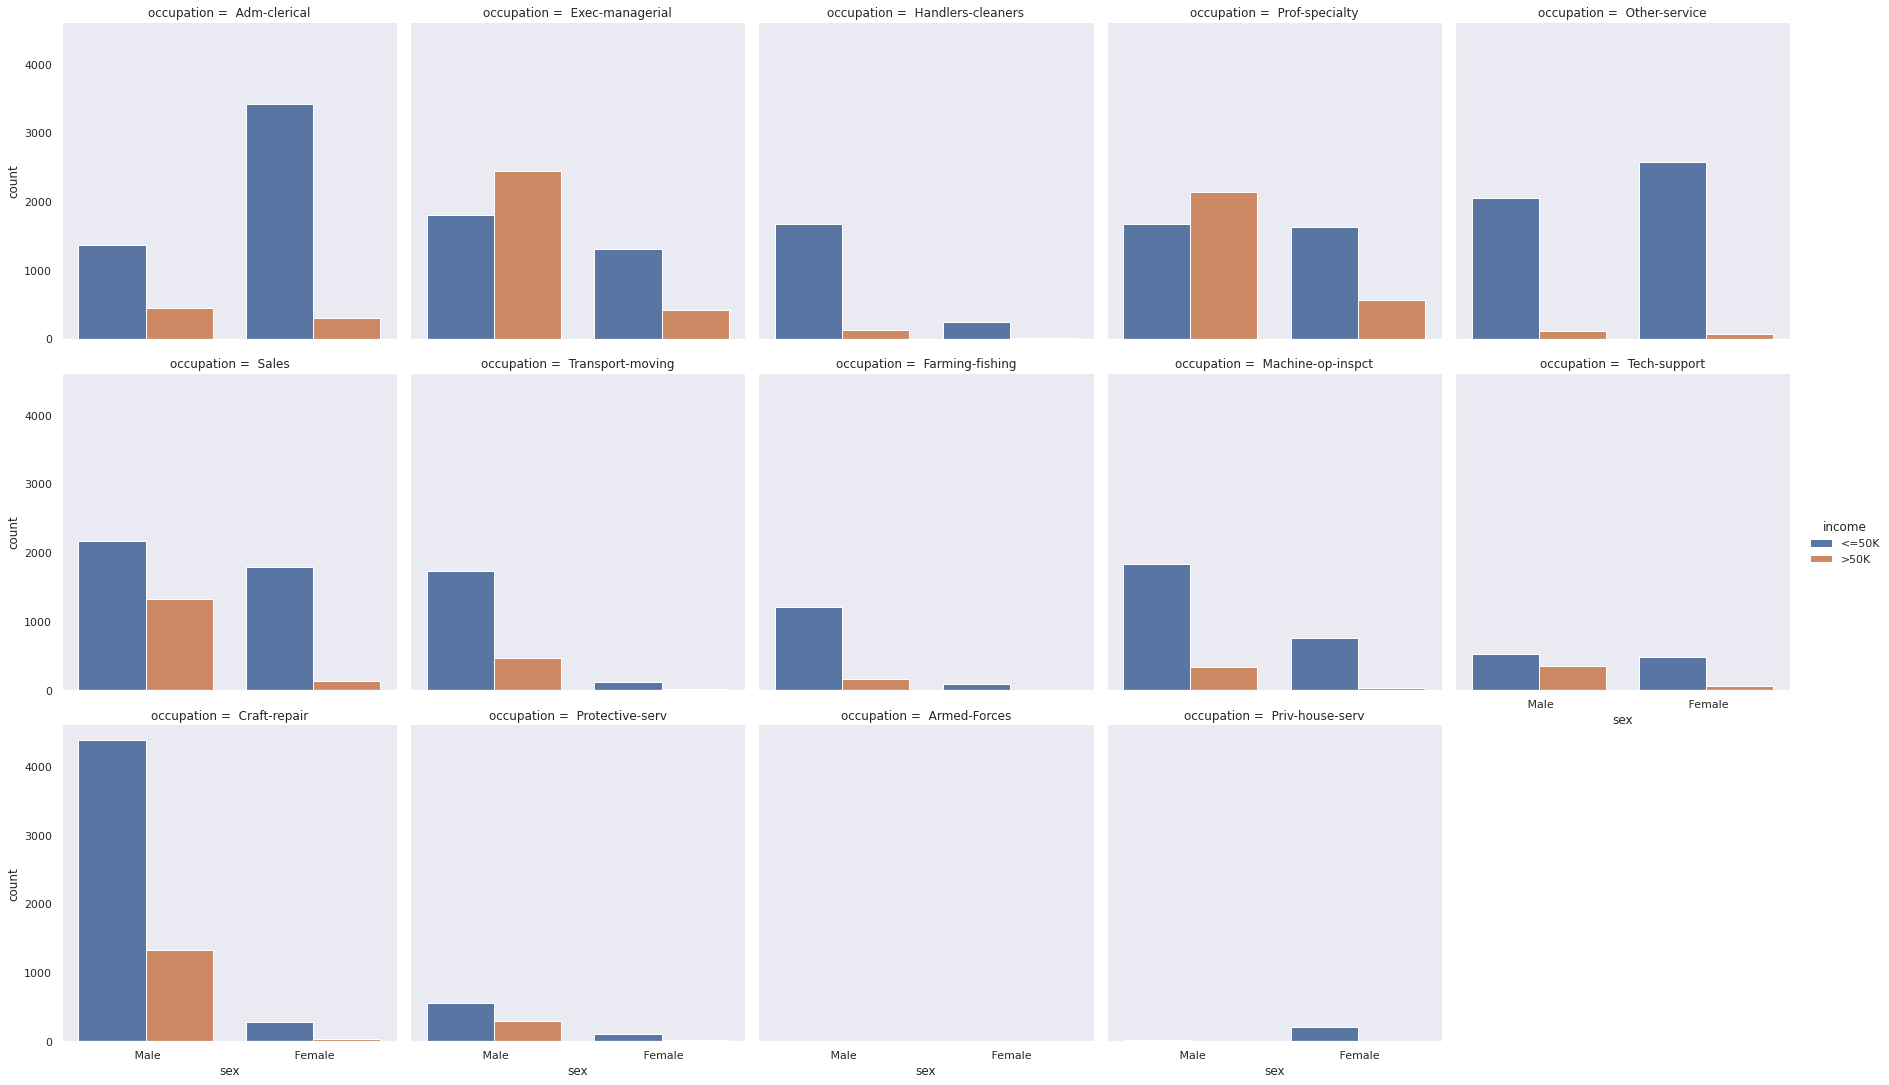

In [213]:
# hide_code

x = sns.factorplot("sex",
                   col='occupation',
                   data=df,
                   hue='income',
                   kind="count",
                   col_wrap=5)

- Group of graphics 02: count of people who earn above or below 50 thousand based on their sex and occupation

- Analysis of data distribution
   - Below is a visual analysis of outliers with the aid of box-plot

In [214]:
# hide_code

def show_boxplot(df, *columns):
    for column in columns:
        plt.figure (figsize = (17, 0.5)) 
        sns.boxplot(x=df[column],
                    width=0.5,
                    color='#86bf91',
                    linewidth=1.0,
                    showfliers=True)

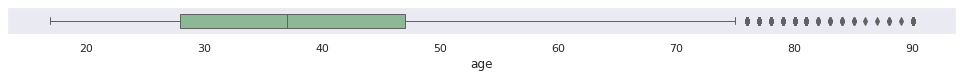

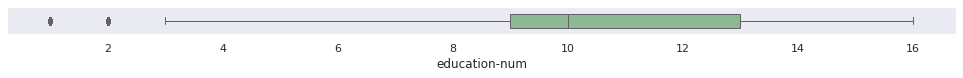

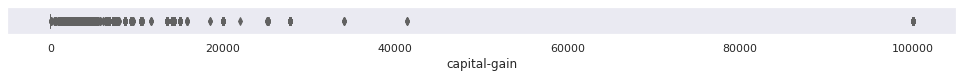

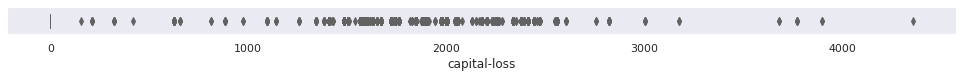

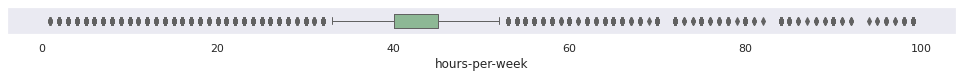

In [215]:
# hide_code

show_boxplot(df, *list_numerical_col)

**NOTES**

When understanding the problem and exploring the data it is possible to say that the 5 attributes that are most important for prediction are these:

- `occupation`: different jobs have different pay scales. Some jobs pay more than others.
- `education`: people who have completed a higher level of education are better equipped to carry out more technical / specialized and well-paid jobs.
- `Age`: as people get older, they accumulate more well-being.
- `working class`: the working class to which they belong can also be correlated with how much money they earn.
- `hours per week`: those who work more hours per week are likely to earn more.

### **Verify Data Quality**
1. Analysis of the loading of the dataset and its metadata
- Check for missing lines
- Check for missing data in the cells
- Check for duplicate lines

In [216]:
# hide_code

df.index

RangeIndex(start=0, stop=45222, step=1)

- The dataset has no missing index values, so there are no missing lines.

In [217]:
# hide_code

# isnull()

def check_if_contains_missing_val(df: 'DataFrame'):
    """
    Return TRUE, if collumn contains values missing
    """
    list_columns_missing = []
    
    for index, value in enumerate(df.isnull().any()):
        if value is True:
            list_columns_missing.append(df.columns[index])
    
    if len(list_columns_missing) > 0:
        print("Columns's name with missing values:")
        return list_columns_missing   
    
    print("The dataframe NOT contains missing values.")
    return None

In [218]:
# hide_code

check_if_contains_missing_val(df)

The dataframe NOT contains missing values.


- The dataset has no missing values in its cells, so there is no missing data.

In [219]:
# hide_code

# duplicated()

def check_quat_duplicated_data(df: 'DataFrame') -> None:
    """
    Check if contains duplicated data
    Mark duplicates as ``True`` if enough row equal
    Except for the first occurrence.    
    """
    duplicated = df.duplicated().sum()
    total_lines = df.shape[0]
    percentage = (duplicated/total_lines) * 100
    
    print("-"*25, "DUPLICATED DATA", "-"*25,)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("TOTAL duplicated data: {}".format(duplicated))
    print("PERCENTAGE duplicated data: {:3.2} %".format(percentage))

In [220]:
# hide_code

check_quat_duplicated_data(df)

------------------------- DUPLICATED DATA -------------------------

SHAPE of data: 45222
TOTAL duplicated data: 5982
PERCENTAGE duplicated data: 1.3e+01 %


- The dataset has 5922 duplicated lines.

**NOTES**

2. Adherence of data to the problem domain
- All columns can influence a person's salary, so it is possible to state that the columns are in accordance with the problem domain.
- It is necessary to analyze the content of the data to find out if they are really relevant and fit within the column they are.

In [221]:
# hide_code

# unique()

def show_categorical_values(df: 'DataFrame', *columns: list) -> None:
    for column in columns:
        list_unique = df[column].unique()
        print(f"The categorical column {column} contains this values:\n\n{list_unique}\n")

In [222]:
# hide_code

show_categorical_values(df, *list_categorical_col)

The categorical column workclass contains this values:

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

The categorical column education_level contains this values:

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

The categorical column marital-status contains this values:

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

The categorical column occupation contains this values:

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

The categorical column relationship contains this values:

[' Not-in-family' ' Husband' ' Wi

**NOTES**

All categories are consistent with their respective columns.

---

---

## **Data Preparation**

The first step will be the creation of a dataframe for the target variable and another with only the fetures.

In [223]:
# hide_code

income_raw = df['income']
features_raw = df.drop('income', axis=1)

In [224]:
income_raw.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [225]:
features_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00,0.00,40.00,United-States
1,50,Self-emp-not-inc,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00,0.00,13.00,United-States
2,38,Private,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00,0.00,40.00,United-States
3,53,Private,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00,0.00,40.00,United-States
4,28,Private,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00,0.00,40.00,Cuba


### Select Data
As seen in Verify Data Quality, all columns and observations are in accordance with the problem, so the entire dataset will be used at this time.

In [226]:
# hide_code

df.tail(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45221,35,Self-emp-inc,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00,0.00,60.00,United-States,>50K


### Clean Data
- As previously seen, there are duplicate data that need to be treated.

In [227]:
# hide_code

df = df.drop_duplicates(keep='first')
print("Size dataframe = ", df.shape)

Size dataframe =  (39240, 14)


### Construct Data

#### Continuos Data
- As previously analyzed, there are continuous data that present distortions. It is necessary to transform the range of values so as not to affect the performance of a learning algorithm.
To correct this, a logarithmic transformation will be applied.

In [228]:
# hide_code

# Log-transform the skewed features
cols_to_transform = ['capital-gain', 'capital-loss']
df[cols_to_transform] = df[cols_to_transform].apply(lambda x: np.log(x + 1))

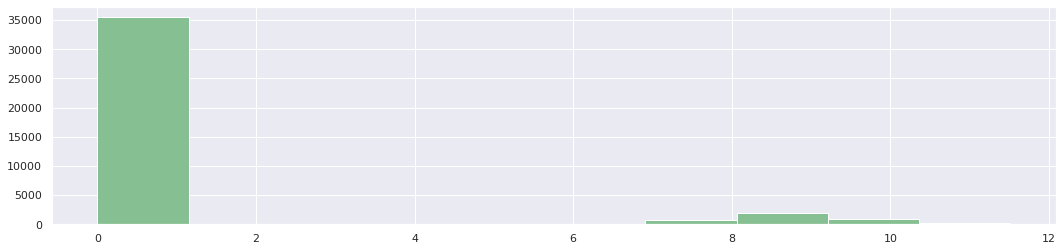

In [229]:
# hide_code

# the histogram of the data
x = df['capital-gain'].hist(figsize=[18,4], 
                        grid=True, 
                        color='#86bf91')

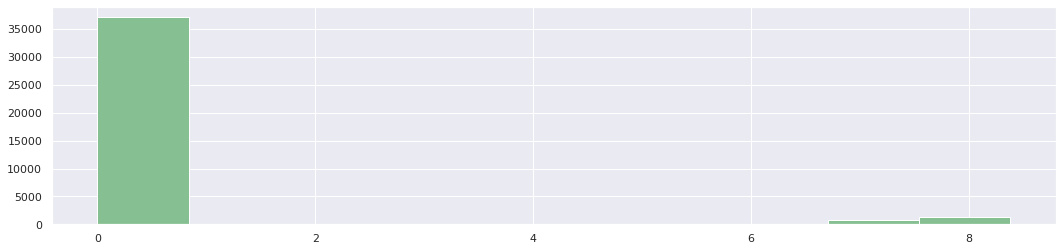

In [230]:
# hide_code

x = df['capital-loss'].hist(figsize=[18,4], 
                        grid=True, 
                        color='#86bf91')

**The normalization of continuous data** ensures that each feature is treated equally by a learning algorithm. Therefore, the scalar minmax technique will be applied.

In [231]:
# hide_code

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
df[list_numerical_col] = scaler.fit_transform(df[list_numerical_col])

In [232]:
# hide_code
df.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.30,State-gov,Bachelors,0.80,Never-married,Adm-clerical,Not-in-family,White,Male,0.67,0.00,0.40,United-States,<=50K


**NOTES**

There are several columns that are not numeric. Generally, learning algorithms expect input to be numeric. Non-numeric, _categorical_ features need to be converted.
We will use **one-hot code**.

In [233]:
# hide_code

features = pd.get_dummies(features_raw)
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.00,2174.00,0.00,40.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13.00,0.00,0.00,13.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9.00,0.00,0.00,40.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7.00,0.00,0.00,40.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13.00,0.00,0.00,40.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
# hide_code

print(f"{len(features.columns)} total features after one-hot encoding.")

103 total features after one-hot encoding.


To simplify the target variable I will use only one column called **income** which only has values 0 and 1.

In [235]:
# hide_code

income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)
income.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

---

---

## **Split Data**

In [236]:
# hide_code

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    income,
                                                    test_size=0.2,
                                                    random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


---

---

## **Training and Evaluation Pipeline**

In [237]:
# hide_code

def train_model(model, X_train, y_train, X_test, y_test) -> dict():
    """Function by Train model"""        
    print(f"Begin training {model}...")
    start = time()
    results = {}

    learner = model.fit(X_train, y_train)
    predictions_test = learner.predict(X_test)
    
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    results['f_test'] = fbeta_score(predictions_test, y_test, beta=0.5)

    end = time()
    print(f'\nTime Elapsed = {end - start} seconds')
    return results

### Decision Tree: baseline
A decision tree can handle numerical and categorical data, it is a good candidate for this type of problem. Another relevant factor is that a decision tree is easy to interpret, that is, we will know what happens behind the scenes to interpret the results.

In [238]:
# hide_code

train_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Begin training DecisionTreeClassifier()...

Time Elapsed = 0.34372377395629883 seconds


{'acc_test': 0.8190160309563295, 'f_test': 0.6180441525269113}

### Vector Support Machine
SVM was chosen because of its effectiveness for high dimensionality. After incorporating dummy variables, we have more than 100 columns in our data set so it becomes a good scenario for testing an SVM. In addition, the data set is not too large to be an impediment.

In [239]:
# hide_code

train_model(SVC(), X_train, y_train, X_test, y_test)

Begin training SVC()...

Time Elapsed = 110.96675968170166 seconds


{'acc_test': 0.7966832504145936, 'f_test': 0.3057516611295681}

### AdaBoost
Ensemble methods, such as Adaboost, are more robust than single predictors as they guarantee a good generalization.

In [240]:
# hide_code

train_model(AdaBoostClassifier(), X_train, y_train, X_test, y_test)

Begin training AdaBoostClassifier()...

Time Elapsed = 2.452986478805542 seconds


{'acc_test': 0.8576008844665561, 'f_test': 0.6299100804543303}

### Analysis
- Looking at the results above, of the three models, AdaBoost is the most suitable for our task. It is the classifier that has the best performance in the test data, both in terms of precision and f-score.
- AdaBoost was the fastest training, while the slowest training was SVM.

---

---

## **Model Tuning**
I will apply a **GridSearchCV** with different combinations of hyperparameter in order to adjust the model and obtain even better results.

For Adaboost, the following hyperparameters will be adjusted:
- n_estimators
- learning rate
- baseline parameters (decision tree)

In [258]:
# hide_code

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'n_estimators':[10, 300], 
              'learning_rate':[0.1, 2.0],
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

In [259]:
%%time
# hide_code

scorer = make_scorer(fbeta_score, 
                     beta=0.5)
grid_obj = GridSearchCV(clf,
                        parameters,
                        scorer)
grid_fit = grid_obj.fit(X_train,
                        y_train)

CPU times: user 38min 1s, sys: 3.34 s, total: 38min 5s
Wall time: 38min 16s


In [260]:
# hide_code

best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)

train_model(best_clf, X_train, y_train, X_test, y_test)

Begin training AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_split=6),
                   learning_rate=0.1, n_estimators=300)...

Time Elapsed = 37.99883532524109 seconds


{'acc_test': 0.8932204386429118, 'f_test': 0.9081271261475371}

In [261]:
# hide_code

print("\nOptimized Model\n------")
print("Final accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score:  {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)


Optimized Model
------
Final accuracy: 0.8932
Final F-score:  0.8835
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_split=6),
                   learning_rate=0.1, n_estimators=300)


**NOTES**

- The optimized model has an accuracy of 0.8710 and an F-score of 0.7525.
- The optimization of the model excels in relation to the preliminary model.

<br/>

### Tunning: Analysis of the Distribution of the Target Variable

Distribution data = [34014 11208]


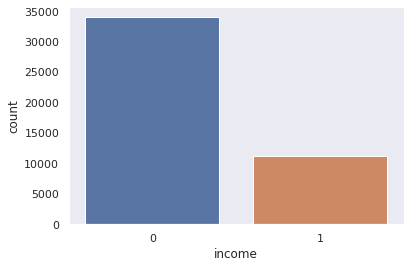

In [262]:
# hide_code

X = features
y = income

print(f'Distribution data = {np.bincount(y)}')
x = sns.countplot(x=y)

It is possible to notice that the data is unbalanced. I will test the technique of under and oversample as recommended by the Professor.

#### Oversample

Distribution data = [34014 34014]


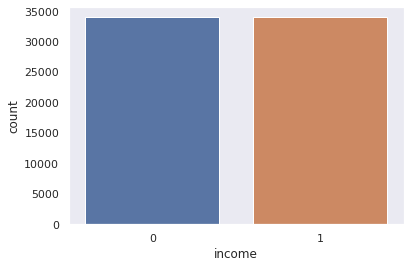

In [263]:
# hide_code

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(f'Distribution data = {np.bincount(y)}')
x = sns.countplot(x=y)

In [264]:
# hide_code

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y)

In [265]:
# hide_code

train_model(best_clf, X_train, y_train, X_test, y_test)

Begin training AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_split=6),
                   learning_rate=0.1, n_estimators=300)...

Time Elapsed = 38.120818853378296 seconds


{'acc_test': 0.8904568707002999, 'f_test': 0.9025978572929066}

#### Undersample

Distribution data = [34014 34014]


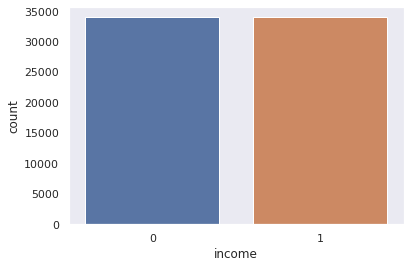

In [266]:
# hide_code

undersample = NearMiss()
X, y = undersample.fit_resample(X, y)

print(f'Distribution data = {np.bincount(y)}')
x = sns.countplot(x=y)

In [267]:
# hide_code

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y)

In [268]:
# hide_code

train_model(best_clf, X_train, y_train, X_test, y_test)

Begin training AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_split=6),
                   learning_rate=0.1, n_estimators=300)...

Time Elapsed = 38.03291177749634 seconds


{'acc_test': 0.8897512788851649, 'f_test': 0.9044933345763028}

**NOTAS**

The best result was obtained with the AdaBoost model, which was optimized with gridSearch and made another tuning with oversample.

Results:
```
{'acc_test': 0.9055016181229774, 'f_test': 0.9070481732945361}
```

#### Better results
I researched the best result found in this dataset. In kaggle there are competitions using this dataset where the leader of the competition got 0.88608.
- https://www.kaggle.com/c/census-income/leaderboard
- https://www.kaggle.com/c/adult-census-income/leaderboard
- https://www.kaggle.com/c/cs189-sp16-hw5-census/leaderboard
- https://www.kaggle.com/c/test-competition-ag/leaderboard (0.88608)
- https://arxiv.org/pdf/1810.10076.pdf

---

## **Save Clean Data**

In [252]:
# hide_code

def save_data_clenning(df: pd.core.frame.DataFrame,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "saved data!"

In [253]:
# hide_code

save_data_clenning(df = df,
                   path = 'data/cleansing/df.csv')

'saved data at data/cleansing/df.csv'

---

#### References
- [1] https://www.researchgate.net/figure/phases-and-generic-tasks-of-CRISP-DM_fig1_283430974